In [1]:
import json
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats  
from datetime import datetime

In [2]:
repo_feature_stat_filename = "OSLOM/repo_feature_statistics.txt"
blue = "#3333FF"
save_dir = 'c:\\Users\\doylle\\Desktop\\charts'

reposize_teams = {}
repowatchers_teams = {}
repoforks_teams = {}
reposubscribers_teams = {}
reposize_contr_rate = {}
repowatchers_contr_rate = {}
repoforks_contr_rate = {}
reposubscribers_contr_rate = {}
cntr_test_A = []
team_cnt_test_A = []
team_member_test_A = []
cntr_test_B = []
with open(repo_feature_stat_filename) as tmj:
    cntr_test_A = json.loads(tmj.readline())
    team_cnt_test_A = json.loads(tmj.readline())
    team_member_test_A = json.loads(tmj.readline())
    cntr_test_B = json.loads(tmj.readline())

In [3]:
for i in range(len(cntr_test_A)):
    cntr_test_A[i][3] = datetime.strptime(cntr_test_A[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(cntr_test_A[i][3][0], '%Y-%m-%dT%H:%M:%SZ')
for i in range(len(team_cnt_test_A)):
    team_cnt_test_A[i][3] = datetime.strptime(team_cnt_test_A[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(team_cnt_test_A[i][3][0], '%Y-%m-%dT%H:%M:%SZ')
for i in range(len(team_member_test_A)):
    team_member_test_A[i][3] = datetime.strptime(team_member_test_A[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(team_member_test_A[i][3][0], '%Y-%m-%dT%H:%M:%SZ')
for i in range(len(cntr_test_B)):
    cntr_test_B[i][3] = datetime.strptime(cntr_test_B[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(cntr_test_B[i][3][0], '%Y-%m-%dT%H:%M:%SZ')

In [4]:
cntr_test_A = np.array(cntr_test_A)
cntrs = np.asarray(cntr_test_A[:,-1],dtype=np.float32)
sizes = np.asarray(cntr_test_A[:,0],dtype=np.int32)
forks = np.asarray(cntr_test_A[:,1],dtype=np.int32)
contributors = np.asarray(cntr_test_A[:,2],dtype=np.int32)
lifetime = np.array([t.total_seconds() for t in cntr_test_A[:,3]])
max_topic_repos = np.asarray(cntr_test_A[:,4],dtype=np.int32)
max_lang_repos = np.asarray(cntr_test_A[:,5],dtype=np.int32)
mean_topic_repos = np.asarray(cntr_test_A[:,6],dtype=np.float32)
mean_lang_repos = np.asarray(cntr_test_A[:,7],dtype=np.float32)

print('\t\t\t\t\tr:\t\tp:')
r,p = stats.pearsonr(sizes,cntrs)
print('%s\t\t\t%f\t%f'%('size v. contr_rate',r,p))
r,p = stats.pearsonr(forks,cntrs)
print('%s\t\t\t%f\t%f'%('forks v. contr_rate',r,p))
r,p = stats.pearsonr(contributors,cntrs)
print('%s\t\t%f\t%f'%('# of contributors v. contr_rate',r,p))
r,p = stats.pearsonr(lifetime,cntrs)
print('%s\t\t\t%f\t%f'%('lifetime v. contr_rate',r,p))
r,p = stats.pearsonr(max_topic_repos,cntrs)
print('%s\t\t%f\t%f'%('max_topic_repos v. contr_rate',r,p))
r,p = stats.pearsonr(max_lang_repos,cntrs)
print('%s\t\t%f\t%f'%('max_lang_repos v. contr_rate',r,p))
r,p = stats.pearsonr(mean_topic_repos,cntrs)
print('%s\t\t%f\t%f'%('mean_topic_repos v. contr_rate',r,p))
r,p = stats.pearsonr(mean_lang_repos,cntrs)
print('%s\t\t%f\t%f'%('mean_lang_repos v. contr_rate',r,p))

					r:		p:
size v. contr_rate			-0.026822	0.000000
forks v. contr_rate			0.024249	0.000000
# of contributors v. contr_rate		0.051509	0.000000
lifetime v. contr_rate			0.035975	0.000000
max_topic_repos v. contr_rate		0.048891	0.000000
max_lang_repos v. contr_rate		0.014912	0.000000
mean_topic_repos v. contr_rate		0.044713	0.000000
mean_lang_repos v. contr_rate		0.014970	0.000000


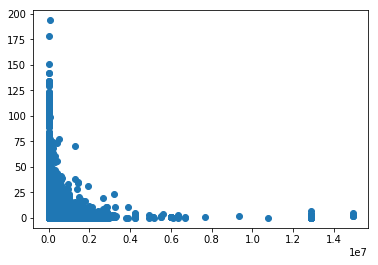

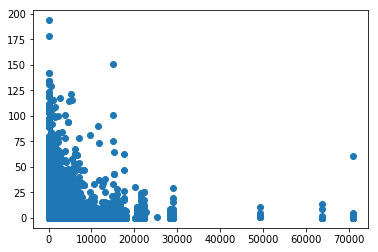

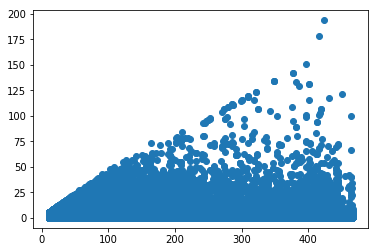

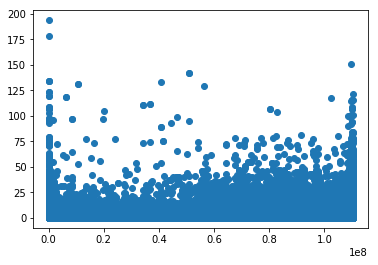

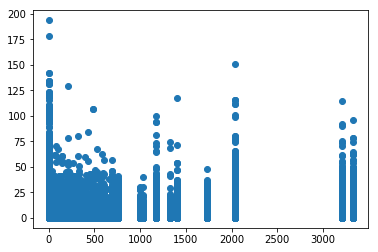

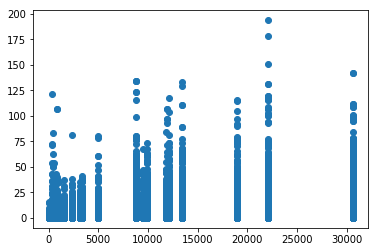

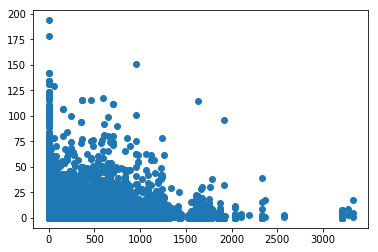

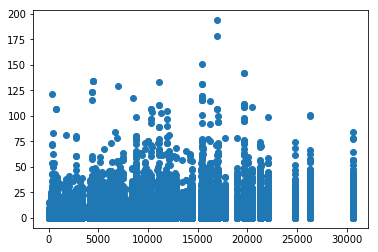

In [5]:
plt.scatter(sizes,cntrs)
plt.show()
plt.scatter(forks,cntrs)
plt.show()
plt.scatter(contributors,cntrs)
plt.show()
plt.scatter(lifetime,cntrs)
plt.show()
plt.scatter(max_topic_repos,cntrs)
plt.show()
plt.scatter(max_lang_repos,cntrs)
plt.show()
plt.scatter(mean_topic_repos,cntrs)
plt.show()
plt.scatter(mean_lang_repos,cntrs)
plt.show()

In [6]:
import pandas as pd
cntr_test_A_pd = pd.DataFrame(cntr_test_A,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','contr_rate'])
cntr_test_A_pd['size'] = pd.to_numeric(cntr_test_A_pd['size'])
cntr_test_A_pd['forks'] = pd.to_numeric(cntr_test_A_pd['forks'])
cntr_test_A_pd['contributors'] = pd.to_numeric(cntr_test_A_pd['contributors'])
cntr_test_A_pd['contr_rate'] = pd.to_numeric(cntr_test_A_pd['contr_rate'])
cntr_test_A_pd['lifetime'] = pd.to_timedelta(cntr_test_A_pd['lifetime'])
cntr_test_A_pd['max_topic_repos'] = pd.to_numeric(cntr_test_A_pd['max_topic_repos'])
cntr_test_A_pd['max_lang_repos'] = pd.to_numeric(cntr_test_A_pd['max_lang_repos'])
cntr_test_A_pd['mean_topic_repos'] = pd.to_numeric(cntr_test_A_pd['mean_topic_repos'])
cntr_test_A_pd['mean_lang_repos'] = pd.to_numeric(cntr_test_A_pd['mean_lang_repos'])

cntr_test_A_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,contr_rate
count,1.892320e+05,189232.000000,189232.000000,189232,189232.000000,189232.000000,189232.000000,189232.000000,189232.000000
mean,8.184808e+04,482.360172,103.415828,861 days 13:43:25.438895,331.561353,18318.180192,91.567238,13732.739531,2.308674
std,3.107787e+05,2210.377006,117.699543,422 days 11:07:01.141946,821.703517,9014.935157,233.032626,7348.353035,4.903413
min,0.000000e+00,0.000000,10.000000,0 days 00:00:00,0.000000,1.000000,0.000000,1.000000,0.001051
25%,1.029000e+03,13.000000,20.000000,653 days 03:28:51.250000,0.000000,11826.000000,0.000000,8427.500000,0.238806
50%,6.797000e+03,50.000000,46.000000,997 days 04:25:55,0.000000,18956.000000,0.000000,12775.000000,0.844466
75%,4.461400e+04,220.000000,146.000000,1232 days 13:18:58,63.000000,30616.000000,31.666667,18956.000000,2.491622
max,1.493212e+07,70893.000000,467.000000,1276 days 23:57:47,3326.000000,30616.000000,3326.000000,30616.000000,193.745348


In [7]:
cntr_test_B_pd = pd.DataFrame(cntr_test_B,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','contr_rate'])
cntr_test_B_pd['size'] = pd.to_numeric(cntr_test_B_pd['size'])
cntr_test_B_pd['forks'] = pd.to_numeric(cntr_test_B_pd['forks'])
cntr_test_B_pd['contributors'] = pd.to_numeric(cntr_test_B_pd['contributors'])
cntr_test_B_pd['contr_rate'] = pd.to_numeric(cntr_test_B_pd['contr_rate'])
cntr_test_B_pd['lifetime'] = pd.to_timedelta(cntr_test_B_pd['lifetime'])
cntr_test_B_pd['max_topic_repos'] = pd.to_numeric(cntr_test_B_pd['max_topic_repos'])
cntr_test_B_pd['max_lang_repos'] = pd.to_numeric(cntr_test_B_pd['max_lang_repos'])
cntr_test_B_pd['mean_topic_repos'] = pd.to_numeric(cntr_test_B_pd['mean_topic_repos'])
cntr_test_B_pd['mean_lang_repos'] = pd.to_numeric(cntr_test_B_pd['mean_lang_repos'])

cntr_test_B_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,contr_rate
count,4.012410e+05,401241.000000,401241.000000,401241,401241.000000,401241.000000,401241.000000,401241.000000,401241.000000
mean,4.232299e+05,270.918964,154.553864,591 days 07:41:12.561126,201.689954,18859.577149,55.528852,13854.142594,2.468001
std,1.834957e+06,1613.807547,139.669354,506 days 06:45:28.758152,661.853860,8921.216142,189.273064,7141.663175,5.433247
min,0.000000e+00,0.000000,10.000000,0 days 00:00:00,0.000000,1.000000,0.000000,1.000000,0.001003
25%,2.680000e+03,0.000000,28.000000,2 days 19:40:19,0.000000,11826.000000,0.000000,8427.500000,0.243404
50%,2.354000e+04,7.000000,98.000000,650 days 21:42:29,0.000000,18956.000000,0.000000,12775.000000,0.871838
75%,1.349500e+05,75.000000,285.000000,1111 days 11:07:17,0.000000,30616.000000,0.000000,19689.500000,2.565957
max,2.292944e+07,70893.000000,467.000000,1276 days 23:57:47,3326.000000,30616.000000,3326.000000,30616.000000,194.599665


In [8]:
team_cnt_test_A = np.array(team_cnt_test_A)
team_cnts = np.asarray(team_cnt_test_A[:,-1],dtype=np.float32)
sizes = np.asarray(team_cnt_test_A[:,0],dtype=np.int32)
forks = np.asarray(team_cnt_test_A[:,1],dtype=np.int32)
contributors = np.asarray(team_cnt_test_A[:,2],dtype=np.int32)
lifetime = np.array([t.total_seconds() for t in team_cnt_test_A[:,3]])
max_topic_repos = np.asarray(team_cnt_test_A[:,4],dtype=np.int32)
max_lang_repos = np.asarray(team_cnt_test_A[:,5],dtype=np.int32)
mean_topic_repos = np.asarray(team_cnt_test_A[:,6],dtype=np.float32)
mean_lang_repos = np.asarray(team_cnt_test_A[:,7],dtype=np.float32)

print('\t\t\t\t\tr:\t\tp:')
r,p = stats.pearsonr(sizes,team_cnts)
print('%s\t\t\t%f\t%f'%('size v. # of teams',r,p))
r,p = stats.pearsonr(forks,team_cnts)
print('%s\t\t\t%f\t%f'%('forks v. # of teams',r,p))
r,p = stats.pearsonr(contributors,team_cnts)
print('%s\t\t%f\t%f'%('# of contributors v. # of teams',r,p))
r,p = stats.pearsonr(lifetime,team_cnts)
print('%s\t\t\t%f\t%f'%('lifetime v. # of teams',r,p))
r,p = stats.pearsonr(max_topic_repos,team_cnts)
print('%s\t\t%f\t%f'%('max_topic_repos v. # of teams',r,p))
r,p = stats.pearsonr(max_lang_repos,team_cnts)
print('%s\t\t%f\t%f'%('max_lang_repos v. # of teams',r,p))
r,p = stats.pearsonr(mean_topic_repos,team_cnts)
print('%s\t\t%f\t%f'%('mean_topic_repos v. # of teams',r,p))
r,p = stats.pearsonr(mean_lang_repos,team_cnts)
print('%s\t\t%f\t%f'%('mean_lang_repos v. # of teams',r,p))

					r:		p:
size v. # of teams			0.001397	0.675584
forks v. # of teams			0.245887	0.000000
# of contributors v. # of teams		0.388369	0.000000
lifetime v. # of teams			0.156409	0.000000
max_topic_repos v. # of teams		0.077017	0.000000
max_lang_repos v. # of teams		-0.004247	0.203317
mean_topic_repos v. # of teams		0.076595	0.000000
mean_lang_repos v. # of teams		-0.022285	0.000000


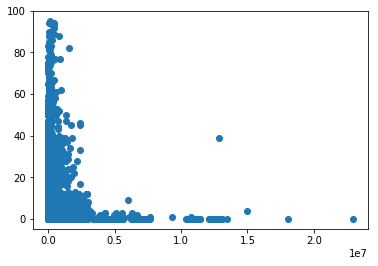

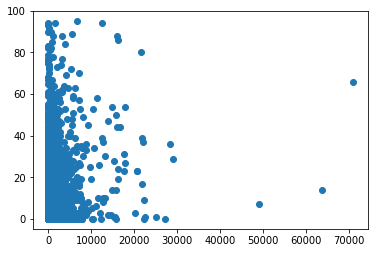

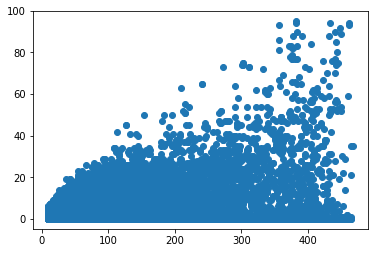

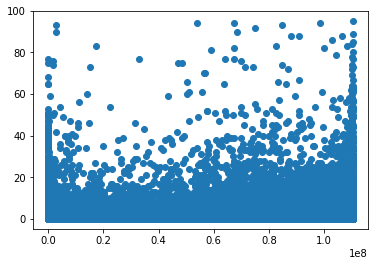

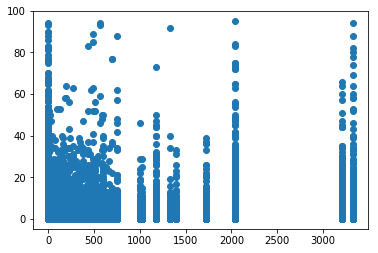

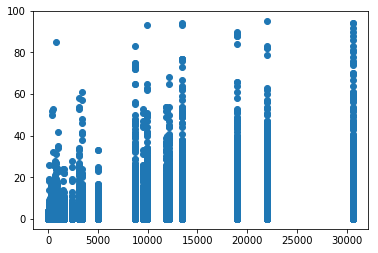

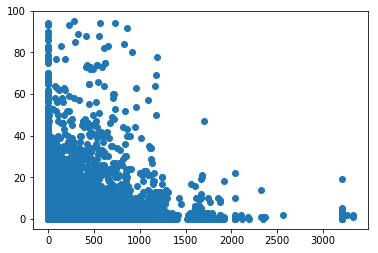

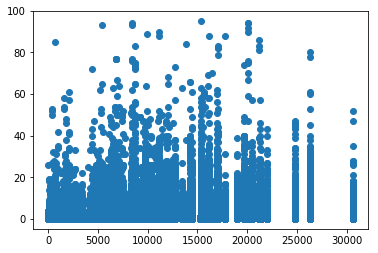

In [9]:
plt.scatter(sizes,team_cnts)
plt.show()
plt.scatter(forks,team_cnts)
plt.show()
plt.scatter(contributors,team_cnts)
plt.show()
plt.scatter(lifetime,team_cnts)
plt.show()
plt.scatter(max_topic_repos,team_cnts)
plt.show()
plt.scatter(max_lang_repos,team_cnts)
plt.show()
plt.scatter(mean_topic_repos,team_cnts)
plt.show()
plt.scatter(mean_lang_repos,team_cnts)
plt.show()

In [10]:
team_cnt_test_A_pd = pd.DataFrame(team_cnt_test_A,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','team_cnt'])
team_cnt_test_A_pd['size'] = pd.to_numeric(team_cnt_test_A_pd['size'])
team_cnt_test_A_pd['forks'] = pd.to_numeric(team_cnt_test_A_pd['forks'])
team_cnt_test_A_pd['contributors'] = pd.to_numeric(team_cnt_test_A_pd['contributors'])
team_cnt_test_A_pd['team_cnt'] = pd.to_numeric(team_cnt_test_A_pd['team_cnt'])
team_cnt_test_A_pd['lifetime'] = pd.to_timedelta(team_cnt_test_A_pd['lifetime'])
team_cnt_test_A_pd['max_topic_repos'] = pd.to_numeric(team_cnt_test_A_pd['max_topic_repos'])
team_cnt_test_A_pd['max_lang_repos'] = pd.to_numeric(team_cnt_test_A_pd['max_lang_repos'])
team_cnt_test_A_pd['mean_topic_repos'] = pd.to_numeric(team_cnt_test_A_pd['mean_topic_repos'])
team_cnt_test_A_pd['mean_lang_repos'] = pd.to_numeric(team_cnt_test_A_pd['mean_lang_repos'])

team_cnt_test_A_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,team_cnt
count,8.974300e+04,89743.000000,89743.000000,89743,89743.000000,89743.000000,89743.000000,89743.000000,89743.000000
mean,8.000597e+04,124.452648,45.077377,699 days 14:49:02.038476,216.864101,18403.771704,58.937257,14104.705598,2.108599
std,6.043440e+05,667.114530,68.845553,474 days 13:33:53.501098,682.544354,9237.447177,195.244897,7649.980071,4.600796
min,0.000000e+00,0.000000,10.000000,0 days 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000
25%,5.410000e+02,3.000000,13.000000,148 days 03:05:39.500000,0.000000,11826.000000,0.000000,8427.500000,0.000000
50%,3.266000e+03,23.000000,19.000000,814 days 05:08:31,0.000000,18956.000000,0.000000,12775.000000,1.000000
75%,2.312500e+04,77.000000,40.000000,1145 days 20:21:22.500000,0.000000,30616.000000,0.000000,19689.500000,2.000000
max,2.292944e+07,70893.000000,467.000000,1276 days 23:57:47,3326.000000,30616.000000,3326.000000,30616.000000,95.000000


In [11]:
team_member_test_A = np.array(team_member_test_A)
team_members = np.asarray(team_member_test_A[:,-1],dtype=np.float32)
sizes = np.asarray(team_member_test_A[:,0],dtype=np.int32)
forks = np.asarray(team_member_test_A[:,1],dtype=np.int32)
contributors = np.asarray(team_member_test_A[:,2],dtype=np.int32)
lifetime = np.array([t.total_seconds() for t in team_member_test_A[:,3]])
max_topic_repos = np.asarray(team_member_test_A[:,4],dtype=np.int32)
max_lang_repos = np.asarray(team_member_test_A[:,5],dtype=np.int32)
mean_topic_repos = np.asarray(team_member_test_A[:,6],dtype=np.float32)
mean_lang_repos = np.asarray(team_member_test_A[:,7],dtype=np.float32)
team_members_ratio = team_members/contributors

print('\t\t\t\t\t\tr:\t\tp:')
r,p = stats.pearsonr(sizes,team_members_ratio)
print('%s\t\t\t%f\t%f'%('size v. team_members_ratio',r,p))
r,p = stats.pearsonr(forks,team_members_ratio)
print('%s\t\t\t%f\t%f'%('forks v. team_members_ratio',r,p))
r,p = stats.pearsonr(contributors,team_members_ratio)
print('%s\t\t%f\t%f'%('# of contributors v. team_members_ratio',r,p))
r,p = stats.pearsonr(lifetime,team_members_ratio)
print('%s\t\t\t%f\t%f'%('lifetime v. team_members_ratio',r,p))
r,p = stats.pearsonr(max_topic_repos,team_members_ratio)
print('%s\t\t%f\t%f'%('max_topic_repos v. team_members_ratio',r,p))
r,p = stats.pearsonr(max_lang_repos,team_members_ratio)
print('%s\t\t%f\t%f'%('max_lang_repos v. team_members_ratio',r,p))
r,p = stats.pearsonr(mean_topic_repos,team_members_ratio)
print('%s\t\t%f\t%f'%('mean_topic_repos v. team_members_ratio',r,p))
r,p = stats.pearsonr(mean_lang_repos,team_members_ratio)
print('%s\t\t%f\t%f'%('mean_lang_repos v. team_members_ratio',r,p))

						r:		p:
size v. team_members_ratio			-0.053040	0.000000
forks v. team_members_ratio			-0.066028	0.000000
# of contributors v. team_members_ratio		-0.223569	0.000000
lifetime v. team_members_ratio			0.020879	0.000002
max_topic_repos v. team_members_ratio		-0.062900	0.000000
max_lang_repos v. team_members_ratio		0.029716	0.000000
mean_topic_repos v. team_members_ratio		-0.049366	0.000000
mean_lang_repos v. team_members_ratio		0.024404	0.000000


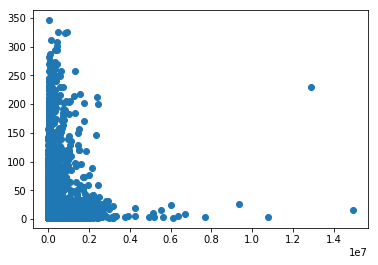

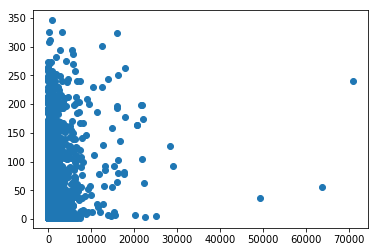

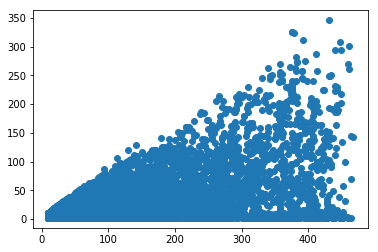

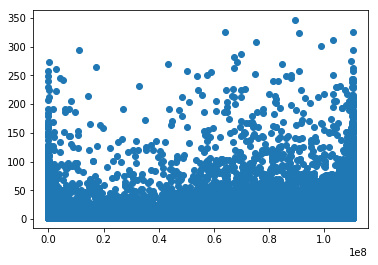

In [12]:
plt.scatter(sizes,team_members)
plt.show()
plt.scatter(forks,team_members)
plt.show()
plt.scatter(contributors,team_members)
plt.show()
plt.scatter(lifetime,team_members)
plt.show()

In [13]:
team_member_test_A_pd = pd.DataFrame(team_member_test_A,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','team_members'])
team_member_test_A_pd['size'] = pd.to_numeric(team_member_test_A_pd['size'])
team_member_test_A_pd['forks'] = pd.to_numeric(team_member_test_A_pd['forks'])
team_member_test_A_pd['contributors'] = pd.to_numeric(team_member_test_A_pd['contributors'])
team_member_test_A_pd['team_members'] = pd.to_numeric(team_member_test_A_pd['team_members'])
team_member_test_A_pd['lifetime'] = pd.to_timedelta(team_member_test_A_pd['lifetime'])
team_member_test_A_pd['max_topic_repos'] = pd.to_numeric(team_member_test_A_pd['max_topic_repos'])
team_member_test_A_pd['max_lang_repos'] = pd.to_numeric(team_member_test_A_pd['max_lang_repos'])
team_member_test_A_pd['mean_topic_repos'] = pd.to_numeric(team_member_test_A_pd['mean_topic_repos'])
team_member_test_A_pd['mean_lang_repos'] = pd.to_numeric(team_member_test_A_pd['mean_lang_repos'])

team_member_test_A_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,team_members
count,5.150200e+04,51502.000000,51502.000000,51502,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000
mean,4.545921e+04,163.248825,43.152868,832 days 22:05:50.122111,259.405654,18340.014582,71.012504,13999.029144,11.621646
std,2.149481e+05,832.542948,63.717503,410 days 15:10:12.450655,735.273426,9253.072702,211.872889,7663.976392,19.694111
min,0.000000e+00,0.000000,10.000000,0 days 00:00:00,0.000000,1.000000,0.000000,1.000000,2.000000
25%,5.060000e+02,10.000000,13.000000,627 days 16:36:26.250000,0.000000,11826.000000,0.000000,8397.000000,3.000000
50%,2.821000e+03,32.000000,20.000000,943 days 22:27:13,0.000000,18956.000000,0.000000,12775.000000,6.000000
75%,1.857850e+04,98.000000,40.000000,1190 days 14:03:55.500000,0.000000,30616.000000,0.000000,19689.500000,12.000000
max,1.493212e+07,70893.000000,467.000000,1276 days 23:57:47,3326.000000,30616.000000,3326.000000,30616.000000,346.000000


In [14]:
import statsmodels.stats.weightstats as st

cntr_A = cntrs
cntr_test_B = np.array(cntr_test_B)
cntr_B = np.asarray(cntr_test_B[:,-1],dtype=np.float32)
t,p_twotail,df=st.ttest_ind(cntr_A,cntr_B,usevar='unequal')
print(t,p_twotail,df)

-11.248423834663782 2.3813139608830075e-29 407402.5441836462


In [15]:
print(cntr_A.mean(),cntr_B.mean())

2.3086736 2.468001


In [16]:
from scipy import stats
t,p_twotail=stats.ttest_1samp(cntr_A,1)
p_onetail=p_twotail/2
print(t,p_onetail,cntr_A.size-1)

116.09944603471462 0.0 189231


In [17]:
CI = 1.6449*stats.sem(cntr_A)
print(cntr_A.mean(),cntr_A.std())
print(cntr_A.mean()-CI,cntr_A.mean()+CI)
print((cntr_A.mean()-1)/cntr_A.std())

2.3086736 4.9034
2.290132297583778 2.32721494286422
0.26689106234212684
